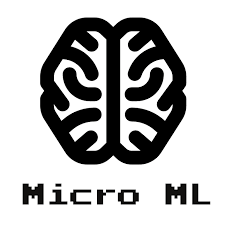

# MicroML on Arduino
[MicroML](https://openbase.com/python/micromlgen) bring Machine Learning algorithms to microcontrollers.

**Supported classifiers**
* DecisionTree
* RandomForest
* XGBoost
* Gaussian Naive Bayes
* Support Vector Machines (SVC and OneClassSVM)
* Relevant Vector Machines
* SEFR (Fast Linear-Time Classifier)
* PCA (Principal Component Analysis)

**Install micromlgen**
```
pip install micromlgen
```



In [ ]:
pip install micromlgen

#Setup Python Environment
The next cell sets up the dependencies in required for the notebook, run it.

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from micromlgen import port
from glob import glob
from os.path import basename

# Create a Function to Handle the Dataset

In [ ]:
def load_features(folder):
    dataset = None
    classmap = {}
    for class_idx, filename in enumerate(glob('%s/*.csv' % folder)):
        class_name = basename(filename)[:-4]
        classmap[class_idx] = class_name
        samples = np.loadtxt(filename, dtype=float, delimiter=',')
        labels = np.ones((len(samples), 1)) * class_idx
        samples = np.hstack((samples, labels))
        dataset = samples if dataset is None else np.vstack((dataset, samples))
    return dataset, classmap

#Upload Data
* Open the panel on the left side of Colab by clicking on the folder icon.
* Create a folder and name it "dataset".
* Drag csv files from your computer to the tab to upload them into colab.

In [ ]:
features, classmap = load_features('/content/dataset')
X, y = features[:, :-1], features[:, -1]

# Train the Machine Learning Classifier
Although this is a Random Forest classifier, you may replace it with any of the others without affecting the rest of the code.

In [ ]:
classifier = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X, y)

# Port the Model to plain C/C++ code
Copy the resulting codes to your Arduino classifier sketch.

In [ ]:
c_code = port(classifier, classmap=classmap)
print(c_code)

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class RandomForest {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        uint8_t votes[3] = { 0 };
                        // tree #1
                        if (x[2] <= 2.449999988079071) {
                            votes[0] += 1;
                        }

                        else {
                            if (x[3] <= 1.75) {
                                if (x[2] <= 5.049999952316284) {
                                    if (x[0] <= 4.950000047683716) {
                                        if (x[1] <= 2.450000047683716) {
                                            votes[2] += 1;
                                        }

                                        else {
                                            votes[1]